In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Simple Model

Simple model to predict significant wave height of one buoy based on another buoy's data.

In [4]:
import logging
import warnings

import mlflow

from marine_ml.helpers.mlflow_helper import MLFlowHelper
from marine_ml.train import get_dataset, split_data

warnings.filterwarnings("ignore")

logging.basicConfig(level=logging.INFO)

logger = logging.getLogger("exploration")

mlflow.set_tracking_uri("http://localhost:5000")

# Load Data

In [17]:
X, y = get_dataset()
X_train, X_test, y_train, y_test = split_data(X, y)

# Setup MLFlow Experiment

In [18]:
experiment_id = MLFlowHelper.get_or_create_experiment(experiment_name="pz_predict_lev")
experiment_id

'1'

In [19]:
run_name = "first_attempt"

# Run

INFO:marine_ml.helpers.optuna_helper:Initial trial 0 achieved value: 0.1360982463560481


🏃 View run learned-skunk-831 at: http://localhost:5000/#/experiments/0/runs/aab238585c1c46e7b1b9645ffd990746
🧪 View experiment at: http://localhost:5000/#/experiments/0


INFO:marine_ml.helpers.optuna_helper:Trial 1 achieved value: 0.13015005242467229 with  4.5703% improvement


🏃 View run indecisive-ape-798 at: http://localhost:5000/#/experiments/0/runs/9494f9cdc76543ec80436b8c0eecf413
🧪 View experiment at: http://localhost:5000/#/experiments/0


INFO:marine_ml.helpers.optuna_helper:Trial 2 achieved value: 0.12909445205219566 with  0.8177% improvement


🏃 View run luxuriant-bass-935 at: http://localhost:5000/#/experiments/0/runs/97bbafca9880463d8e4b848a3de3ee10
🧪 View experiment at: http://localhost:5000/#/experiments/0


INFO:marine_ml.helpers.optuna_helper:Trial 3 achieved value: 0.11061830776223394 with  16.7026% improvement


🏃 View run honorable-wren-458 at: http://localhost:5000/#/experiments/0/runs/07b14e2bf0ee46468cb31afe54a28d9a
🧪 View experiment at: http://localhost:5000/#/experiments/0
🏃 View run beautiful-zebra-217 at: http://localhost:5000/#/experiments/0/runs/2a3659aa522a444a8b889d40cd9ba765
🧪 View experiment at: http://localhost:5000/#/experiments/0
🏃 View run loud-kit-449 at: http://localhost:5000/#/experiments/0/runs/15152e6a66354cc19bffda595a875269
🧪 View experiment at: http://localhost:5000/#/experiments/0
🏃 View run invincible-flea-11 at: http://localhost:5000/#/experiments/0/runs/0d5ff4f68bf14c1ea6e0343e8d546b4e
🧪 View experiment at: http://localhost:5000/#/experiments/0
🏃 View run monumental-grub-965 at: http://localhost:5000/#/experiments/0/runs/a4c0fea57d5e4135a6083e58450eaddb
🧪 View experiment at: http://localhost:5000/#/experiments/0
🏃 View run thoughtful-crane-796 at: http://localhost:5000/#/experiments/0/runs/67a1ec87e3eb42bd8aa1c6b963104e5e
🧪 View experiment at: http://localhost:500

2025/12/26 19:52:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run first_attempt at: http://localhost:5000/#/experiments/1/runs/ea29919e0f60471db82d78550fb3c67f
🧪 View experiment at: http://localhost:5000/#/experiments/1


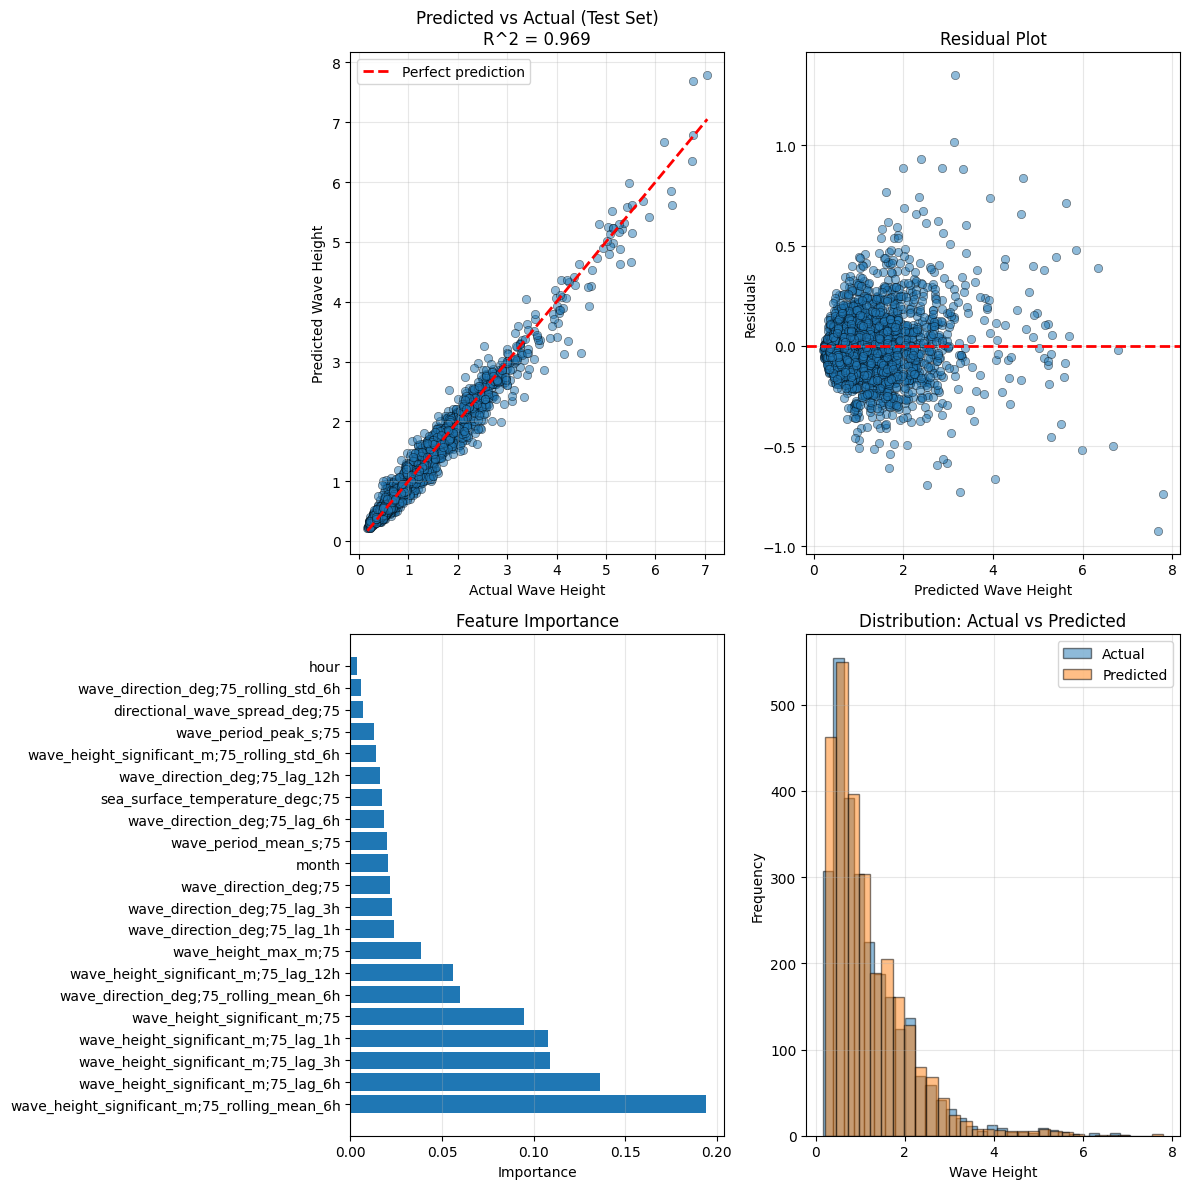

In [20]:
from marine_ml.helpers.optuna_helper import run_optuna_rf

model_uri = run_optuna_rf(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    experiment_id=experiment_id,
    run_name=run_name,
    n_trials=10,
)